# Исследование надежности заемщиков 💰.

По данным на 2021-й год, кредитными продуктами пользуется каждый третий россиянин (источник: Ассоциация Российских Банков). Оценка кредитоспособности клиента - важнейший этап при принятии решения о выдаче денежных средств клиенту. В данном исследовании мы выясним, как связана надёжность заёмщиков с основными показателями его жизни.

**Цель исследования** проверка четырёх гипотез:<br>
1. Возврат кредита в срок зависит от количества детей у заёмщика.
2. Возврат кредита в срок зависит от семейного положения заёмщика.
3. Возврат кредита в срок зависит от уровня дохода клиента.
4. Возрат кредита в срок зависит от цели займа. <br>

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.<br>

**Ход исследования**:

Статистические данные от банка находится в файле `/datasets/data.csv`.<br>

Описание данных:<br>
*children* — количество детей в семье<br>
*days_employed* — общий трудовой стаж в днях<br>
*dob_years* — возраст клиента в годах<br>
*education* — уровень образования клиента<br>
*education_id* — идентификатор уровня образования<br>
*family_status* — семейное положение<br>
*family_status_id* — идентификатор семейного положения<br>
*gender* — пол клиента<br>
*income_type* — тип занятости<br>
*debt* — имел ли задолженность по возврату кредитов<br>
*total_income* — ежемесячный доход<br>
*purpose* — цель получения кредита.<br>

**Этапы выполнения проекта:**<br>
1. Обзор данных.
2. Предобработка данных.<br>
3. Проверка гипотез.
4. Вывод.


# 1. Обзор данных


Импортируем библиотеку `pandas` для анализа данных и вводим сокращение `pd`:

# импорт библиотеки pandas:

In [1]:
import pandas as pd

Открываем файл со статистическими данными клиентов банка. Просматриваем сначала несколько произвольно выбранных 

In [2]:
try: 
    clients = pd.read_csv('/datasets/data.csv')
except: 
    clients = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
clients.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


# просмотр последних 10 строк из таблицы clients:

In [3]:
clients.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


**Описание данных:**<br>
*children* — количество детей в семье <br>
*days_employed* — общий трудовой стаж в днях (данные содержат артефакты - отрицательные значения количества дней и с очень большим абсолютным значением, а также имеют тип float, что не очень удобно)<br>
*dob_years* — возраст клиента в годах<br>
*education* — уровень образования клиента (данные не приведены к нижнему регистру)<br>
*education_id* — идентификатор уровня образования<br>
*family_status* — семейное положение<br>
*family_status_id* — идентификатор семейного положения<br>
*gender* — пол клиента<br>
*income_type* — тип занятости<br>
*debt* — имел ли задолженность по возврату кредитов<br>
*total_income* — ежемесячный доход (для удобства следует заменить вещественный тип данных в этой колонке на целочисленный)<br>
*purpose* — цель получения кредита.<br>

Выведем на экран названия столбцов и проверим, нуждается ли в коррекции их стиль:


# перечень названий колонок таблицы clients

In [4]:
clients.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Названия колонок отражают суть данных, записаны в нижнем змеином регистре и латиницей, скрытые пробелы отсутствую

</div>

Изучим общую информацию о таблице:

# получение общей информации о данных в таблице clients:

In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Заполненных ячеек в колонках `days_employed` и `total_income` меньше, чем в остальных колонках, следовательно, в них есть пропуски. <br>
Нужно будет:<br>
- проверить, какую долю пропущенные значения составляют в каждом из этих столбцов;
- предположить причины их возникновения;
- либо удалить строки с пропусками, либо заполнить их (заполнять будем или медианным значением, или средним, или модой).


# 2. Предобработка данных 

Итак, предобработка данных будет включать следующие этапы:<br>
 2.1. обработка артефактов;<br>
 2.2. обработка пропущенных значений;<br>
 2.3. обработка типов данных;<br>
 2.4. обработка дубликатов;<br>
 2.5. категоризация данных;<br>
 2.6. оптимизация таблицы с учётом категоризации

# 2.1 Обработка артефактов

Вывод части таблицы на экран показал, что что  в столбце `days_employed` содержатся значения, не отражающие действительность: отрицательные числа в колонке трудового стажа.

# Найдём модули всех чисел в колонке 'days_employed':
# ещё один вариант с умножением на (-1), чтобы показать, что я это могу :-)
# вывод 10 первых строк отредактированной таблицы на экран

#clients['days_employed'].abs()

In [6]:
clients.loc[clients['days_employed'] < 0, 'days_employed'] = clients['days_employed']*(-1)
clients.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Всё равно значения некорректные, ведь если перевести количество дней в годы, для некоторых клиентов получится:     

# вычисление трудового стажа в годах для клиента с максиимальным стажем:

In [7]:
clients['days_employed'].max()/365

1100.6997273296713

То есть трудовой стаж более 1000 лет. Посмотрим, кто это:

# вывод строки, содержащей аномальное значение рабочего стажа:

In [8]:
clients.loc[clients['days_employed'] == clients['days_employed'].max()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью


Либо это какая-то ведьма, либо данные указаны неверно. Возможно, в анкете, которые заполняют клиенты банка, нужно было указать количество лет стажа (а дальше это число переводилось в количество дней автоматически), а клиент указал количество месяцев, поэтому после вычислений получились большие числа. <br>
А ещё может быть, что клиенты указывали дату начала трудового стажа, что после обработки привело к подобным артефактам. Хотелось бы посмотреть, как выглядит *анкета*, которую заполняют клиенты, как выглядят вопросы, относящиеся к этим данным. Чуть ниже я озвучу, на что хотелось бы обратить внимание при изучении этой анкеты.<br>
Также следует проанализировать значения в столбце `children`. Выведем на экран уникальные значения этого столбца:


## вывод уникальных значений столбца 'children' на экран

In [9]:
clients['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Есть несколько клиентов с двадцатью детьми и даже с отрицательным количеством детей. Возможно, про 20 детей имеет смысл спросить у кредитного специалиста (если бы такие клиенты были, наверняка о них слагались бы легенды в банке), но скорее всего, это ошибка. Возможно, в виде числа "20" отобразился ответ "2", а в виде "-1" - "1" соответственно. Следует заменить эти ячейки на более реальные значения и проверить, как сработал код.


# замена значений в ячейках колокни 'children', содержащих аномальные значения
# и проверка таблицы после замены

In [10]:
clients.loc[clients['children'] == 20, 'children'] = 2
clients.loc[clients['children'] == -1, 'children'] = 1
clients['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Перерь значения, соответствующие количеству детей клиентов, не содержат артефакты.<br>
Работа с артефактами проведена.

# 2.2 Обработка пропущенных значений

Ознакомление с информацией о таблице показало, что в двух столбцах содержатся пропуски. Посчитаем их количество:

# подсчёт количества пропусков в таблице clients:

In [11]:
clients.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В столбцах `days_employed` (общий трудовой стаж в днях)  и `total_income` (ежемесячный доход) содержатся пропуски. Причём их количество одинаково в обоих колонках. Совпадение? 🧐 Не думаю. Выдвенем гипотезу о том, что клиенты, у которых не указан общий трудовой стаж и клиенты, не указавшие ежемесячный доход - это одни и те же люди. Проверим её, составив датасет только из тех колонок, где пропущены значения `days_employed` и `total_income` одновременно и изучим информацию о нём.


# выделение строк, в которых одновременно выполняется условие days_employed = Nan и total_income = Nan: 
# получение информации о таблице:

In [12]:
clients_nan = clients[clients['days_employed'].isna() & clients['total_income'].isna()]
clients_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Итак, в получившемся датасете 2174 строки, то есть пересечение множеств `days_employed = Nan` и `total_income = Nan` совпадает с количеством элементов каждого из этих множеств. Следовательно, эти множества совпадают. Иными словами, клиенты, у которых не указан общий трудовой стаж и клиенты, не указавшие ежемесячный доход - это одни и те же люди. Гипотеза подтверждена.<br>
Можно провести более подробный анализ этого датасета и выяснить, есть ли что-то общее у людей, не указавших эти данные. Делать я этого, конечно, не буду 🦥. Потому что поверхностные вычисления показывают, что доля Nan'ов - около 10%. Не слишком много, чтобы исказить результат, но и не достатчно мало, чтобы удалять строки с пропусками. Давайте проверим:


#Вот так было:

# вычисление доли пропущенных значений в каждом из столбцов с пропусками (в процентах):

#clients_nan_ratio = clients.isna().mean()*100
#round(clients_nan_ratio, 1)


# вычисление доли пропущенных значений в каждом из столбцов с пропусками (в процентах):

In [13]:
clients_nan_ratio = clients.isna().mean()*100
round(clients_nan_ratio, 1)
clients.isna().mean().map('{:,.1%}'.format)

children             0.0%
days_employed       10.1%
dob_years            0.0%
education            0.0%
education_id         0.0%
family_status        0.0%
family_status_id     0.0%
gender               0.0%
income_type          0.0%
debt                 0.0%
total_income        10.1%
purpose              0.0%
dtype: object

Так и есть, около 10%, надо заполнять. Но чем? <br>
Сперва нужно понять природу этих пропусков. Предположим, что это никогда не работавшие и ныне безработные люди, 

# просмотр уникальных названий типов занятости в датасете clients_nan

In [14]:
clients_nan['income_type'].sort_values().unique()

array(['госслужащий', 'компаньон', 'пенсионер', 'предприниматель',
       'сотрудник'], dtype=object)

Судя по значениям ячеек с типом занятости, безработных и студентов среди людей, не заполнивших поля, нет. Кстати, в общем датасете они есть:


# просмотр уникальных названий типов занятости в датасете clients

In [15]:
clients['income_type'].sort_values().unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

Итак, гипотеза не подтвердилась, так что нули для заполнения не подходят. Думаем дальше.
Данные попадают в датасет из анкет. Значит, уже пора сходить в отдел по работе с клиентами и задать кредитным специалистам разные вопросы: <br>
- Как выглядит анкета? Возможно, вопросы, связанные со стажем и доходами не пропечатались или расположены неудобно.
- Кто заполняет анкету? Может, неопытные сотрудники не занесли ответы в бланк.
- Анкету заполняют в печатном виде или в электронном? Если в электронном, то видимо, поля "стаж" и "доход" являются необязательными.
- Кто выгружает данные? Возможно, потеря произошла на этом этапе. 
- Понятно ли из формулировки вопросов, в каком формате следует записывать ответы? И как потом эти ответы конвертирует компьютер? <br>

Эти вопросы помогут в будущем получать более точные данные, а пока поработаем с тем, что есть. Вместо пропусков значения можно заполнить одним из статистических показателей. Найдём максимум, минимум, среднее арифметическое, медиану и моду для значений из столбцов с пропусками.


In [16]:
clients.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.479721,66914.728907,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,0.755528,139030.880527,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,927.009265,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,2194.220567,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,5537.882441,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


В результатепроделанной работы  метод  получил данные о количестве данных, среднем значении, стандартном отклонении, минимуме, медиане (которые прячутся в строке `50%`), максимуме. 

Рассмотрим значения столбца `days_employed`. Чем заполнить пропуски? Мода, судя количеству значений, неинформативна, отбрасываем её. Среднее арифметическое значение получилось в 30 раз больше медианного, то есть в наборе данных есть большие отклонения (и значения максимума и минимума подтверждают эту догадку), значит, лучше остановиться на центральной тенденции - медиане.
Аналогичные рассуждения можно провести для столбца `total_income`. Здесь, правда, не такое большое отличие медианы от среднего, но реалии таковы, что доходы разных людей могут отличаться довольно существенно, так что в этой колокне выбросы будут встречаться часто. <br>
Заменим пропуски в таблице на медианные значения:

# объвление переменной, содержащей значение медианы значений 'days_employed' и замена ячеек, 
# содержащих пропуски, на медиану.

# закомментированный нерабочий код замены пропусков на медианное значение
# вызов функции info() для проверки работоспособности кода

In [17]:
clients_days_employed_median = clients['days_employed'].median()

# замена пропусков на медианное значение другим способом

In [18]:
clients.loc[clients['days_employed'].isna() ,'days_employed'] = clients_days_employed_median
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Судя по тому, что количество заполненных значений колонки `days_employed` теперь совпадает с количеством заполенных ячеек других столбцов (кроме одного, потому что мы его ещё не заполняли), код сработал корректно. <br>
Аналогичным способом заполним пропуски в колонке `total_income`:

# объвление переменной, содержащей значение медианы значений 'total_income' и замена ячеек, содержащих пропуски, на медиану.
# вызов функции info() для проверки работоспособности кода

In [19]:
clients_total_income_median = clients['total_income'].median()
clients['total_income'] = clients['total_income'].fillna(clients_total_income_median)

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Пропущенные значения обработаны.

# 2.3. Обработка типов данных
Ознакомление с информацией о таблице показало, что данные в колонке `total_income` имеют тип float, что не вполне удобно для анализа. Поскольку эта колонка пригодится нам в дальнейшем для работы, внесём коррективы - изменим тип данных этой колонки на целочисленный.

# изменение типа данных в колонке total_income на целочисленный и проверка кода:

In [20]:
clients['total_income'] = clients['total_income'].astype('int')
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


Теперь значения в колонке `total_income` - целочисленный и с ними удобнее работать. Выглядят они теперь так:

# вывод первых десяти строк таблицы на экран:

In [21]:
clients.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


Данные приведены к типам, удобным для работы.

# 2.4. Обработка дубликатов

Проверим, имеются ли в исходной таблице явные дубликаты:

# подсчёт явных дубликатов:

In [22]:
clients.duplicated().sum()

54

То есть, в таблице есть 54 одинковых строки - вероятно, данные каких-то клиенов были загружены несколько раз, либо они подали несколько одинаковых анкет. В любом случае, дубликаты нужно удалить и убедиться, что мы от них действительно избавились:

# удаление явных дубликатов и проверка наличия дубликатов после работы кода:

In [23]:
clients = clients.drop_duplicates().reset_index(drop=True)
clients.duplicated().sum()

0

Разумеется, количество данных при этом уменьшилось. Определим, данные о скольки клиентах мы теперь имеем:

# получение общей информации о данных в обновлённой таблице clients:


In [24]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     21471 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      21471 non-null  int64  
 11  purpose           21471 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


Явных дубликатов больше нет, но в других колонках могут скрываться неявные. Нам важно проверить колонки `education`, `family_status`, `gender`, `income_type`, `purpose`, потому что данные в них имеют тип object. Найдём количество уникальных значений в каждом столбце:

# подсчёт количества уникальных значений в столбце 'education':


In [25]:
clients['education'].value_counts(ascending=False)

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Опечаток нет, поэтому для устранения неявных дубликатов достаточно просто привести все значения к нижнему регистру и проверить, сколько уникальных значений будет после замены:

# приведение всех значений колонки 'education' к нижнему регистру 
# и проверка количества уникальных значений после срабатывания кода:

In [26]:
clients['education'] = clients['education'].str.lower()
clients['education'].value_counts(ascending=False)

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

После приведения значений к нижнему регистру стоит еще разок проверить датафрейм на наличие явных дубликатов - они хитрее, чем кажутся)

In [27]:
clients.duplicated().sum()

17

Вот же паразиты))). Уберём их.

In [28]:
clients = clients.drop_duplicates().reset_index(drop=True)
clients.duplicated().sum()

0

Теперь в колонке `education` нет неявных дубликатов. Больше всего потенциальных заёмщиков не имеют высшего образования. Надеюсь, они хотят получить деньги на образование? Мы сможем выяснить это чуть позже. <br>
Пока нужно проверить на неявные дубликаты остальные столбцы. Действия будут аналогичны описанным выше. Проверим колонку 
# подсчёт количества уникальных значений в столбце 'family_status':

In [29]:
clients['family_status'].value_counts(ascending=False)

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Отлично, неявных дубликатов нет. Но для красоты и удобства хотелось бы привести к нижнему регистру все символы:

# приведение всех значений колонки 'family_status' к нижнему регистру 
# и проверка количества уникальных значений после срабатывания кода:

In [30]:
clients['family_status'] = clients['family_status'].str.lower()
clients['family_status'].value_counts(ascending=False)

женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Так лучше. Теперь займемся колонкой  `gender`. Очень надеюсь, что их будет только два.

# подсчёт количества уникальных значений в столбце 'gender':

In [31]:
clients['gender'].value_counts(ascending=False)

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

🤦‍♀️ Это что за фигня?

# вывод строки таблицы с неопределённым полом:

In [32]:
clients.loc[clients['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10684,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Ладно. У нас позитивный проект, так что буду думать, что он просто не определился с полом, поругался на этой почве с родителями и хочет съехать в новую квартиру. Желаем удачи! <br> 
Было принято решение присвоить ему мужской пол, чтобы не выбивался из таблицы.

# замена значения в ячейке с непонятным полом на мужской
# проверка на неявные дубликаты после срабатывания кода:

In [33]:
clients.loc[10690,'gender'] = 'M'
clients['gender'].value_counts(ascending=False)

F      14173
M       7280
XNA        1
Name: gender, dtype: int64

Похоже, имеем дело с диктатурой видимо мы В СЕВЕРНОЙ КОРЕЕ)
</div>

Теперь в колонке `gender` нет ничего странного. Займёмся колонкой `income_type`:

# подсчёт количества уникальных значений в столбце 'income_type':

In [34]:
clients['income_type'].value_counts(ascending=False)

сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

Отлично, в этой колонке нет неявных дубликатов. Проверим `purpose`:

# подсчёт количества уникальных значений в столбце 'purpose':


In [35]:
clients['purpose'].value_counts(ascending=False)

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Многие цели схожи по смыслу, но записаны по-разному, потому что формулируют их люди. А ведь если бы клиенту при заполнении анкеты нужно было просто выбрать один из вариантов выпадающего списка, обрабатывать данные было куда проще... <br>

На этом этапе все дубликаты обработаны.

# 2.5. Категоризация данных

Менять все возможные значения ячеек вручную будет неудобно, поэтому напишем функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, включающий следующие категории:
- операции с автомобилем,
- операции с недвижимостью,
- проведение свадьбы,
- получение образования.

Если в цели, записанной клиентом, будут встречаться слова-триггеры, функция автоматически распределит её в ту или иную категорию.

# создание функции purpose_category(purpose) для определения категории, к которой относится цель займа
# если в параметре есть 'автомобил', то она относит цель к категории'операции с автомобилем';
# если в параметре есть 'недвиж' или 'жил', то цель будет отнесена к категории 'операции с недвижимостью'
# и т.п.

In [36]:
def purpose_category(purpose):
    if 'автомобил' in purpose:
        return 'операции с автомобилем'
    if ('недвиж' in purpose) | ('жил' in purpose):
        return 'операции с недвижимостью'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    return 'получение образования'

Проверим работоспособность функции. Для этого присвоим разные значения аргумента и посмотрим на результат:

# присвоение параметру purpose значиния 'свадьба'. Ожидаемый вывод: 'проведение свадьбы'


In [37]:
purpose_category('свадьба')

'проведение свадьбы'

# присвоение параметру purpose значиния 'покупка коммерческой недвижимости'. Ожидаемый вывод: 'операции с недвижимостью'

In [38]:
purpose_category('покупка коммерческой недвижимости')

'операции с недвижимостью'

# присвоение параметру purpose значиния 'на покупку автомобиля'. Ожидаемый вывод: 'операции с автомобилем'

In [39]:
purpose_category('на покупку автомобиля')

'операции с автомобилем'

# присвоение параметру purpose значиния 'получение высшего образования'. Ожидаемый вывод: ''получение образования''

In [40]:
purpose_category('получение высшего образования')

'получение образования'

Функция работает верно. Осталось сформировать колонку `purpose_category` в исходной таблице и вывести результат на экран:


# добавление нового столбца, в котором содержится значение функции 'purpose_category', примененной 
# к параметру в столбце 'purpose'
# вывод десяти первых строк на экран

In [41]:
clients['purpose_category'] = clients['purpose'].apply(purpose_category)
clients.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью


Рассмотрим, как цели кредитов распределились по категориям. Для этого пересчитаем количество уникальных значений в колонке `purpose_category`:

# подсчёт количества уникальных значений в колонке 'purpose_category':

In [42]:
clients['purpose_category'].value_counts(ascending=False)

операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

Чаще всего деньги в этом банке занимают на операции с недвижимостью. <br>
А ещё теперь можно ответить на вопрос, поставленный в пункте 2.4: на что люди без высшего образования чаще берут кредиты? Для этого составим отдельную таблицу, содержащую данные только по клиентам, не имеющим высшего образования. Далее посчитаем количество уникальных значений в колонке `purpose_category`, чтобы понять, на что они берут кредит.


In [43]:
clients[~clients['education'].isin(['высшее', 'ученая степень'])].education.unique()


array(['среднее', 'неоконченное высшее', 'начальное'], dtype=object)

# создание таблицы, не содержащей клиентов с высшим образованием и ученой степенью
# закоментированный код, который не сработал, но имел ту же цель, что и верхний
# подсчёт уникальных значений в колоке 'purpose_category'.

In [44]:
clients_education_purpose = clients[~clients['education'].isin(['высшее', 'ученая степень'])]
clients_education_purpose['purpose_category'].value_counts(ascending=False)


операции с недвижимостью    8126
операции с автомобилем      3270
получение образования       3078
проведение свадьбы          1724
Name: purpose_category, dtype: int64

Судя по тому, что распределения по категориям для обоих групп одинаковое, желания людей без высшего образования мало чем отличаются от желаний образованных людей, в том числе и в области совершенствования умений и навыков 🤷🏼‍♀️. <br>
Но это мы отвлеклись. Следует также поработать с колонкой total_income - ежемесячный доход клиента. Логично, что сколько клиентов, столько и будет значений дохода, и разброс, как мы заметили в п. 2.2, большой. <br>
Анализировать эти данные будет удобнее, если также разбить на категории и добавить соответствующий столбец к таблице.
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

# создание функции total_income_category(total_income) для определения категории, 
# к которой относится величина дохода

In [45]:
def total_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    if total_income <= 50000:
        return 'D'
    if total_income <= 200000:
        return 'C'
    if total_income <= 1000000:
        return 'B'
    return 'A'

Проверим, как функция работает при разном значении параметра.

# присвоение параметру total_income значиния 20000. Ожидаемый вывод: 'E'

In [46]:
total_income_category(20000)

'E'

# присвоение параметру total_income значиния 40000. Ожидаемый вывод: 'D'

In [47]:
total_income_category(40000)

'D'

# присвоение параметру total_income значиния 199000. Ожидаемый вывод: 'C'

In [48]:
total_income_category(199000)

'C'


# присвоение параметру total_income значиния 1000000. Ожидаемый вывод: 'B'

In [49]:
total_income_category(1000000)

'B'

# присвоение параметру total_income значиния 10000000. Ожидаемый вывод: 'A'

In [50]:
total_income_category(10000000)

'A'

# добавление нового столбца, в котором содержится значение функции 'total_income_category',
# примененной к параметру в столбце 'total_income'
# вывод десяти рандомных строк на экран

In [51]:
clients['total_income_category'] = clients['total_income'].apply(total_income_category)
clients.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
11753,0,3202.079716,42,среднее,1,в разводе,3,F,компаньон,0,116811,операции с коммерческой недвижимостью,операции с недвижимостью,C
14815,0,374231.052924,61,среднее,1,в разводе,3,F,пенсионер,0,105164,автомобили,операции с автомобилем,C
9362,1,6499.966350,39,высшее,0,не женат / не замужем,4,F,сотрудник,0,240387,покупка коммерческой недвижимости,операции с недвижимостью,B
2669,2,2194.220567,35,среднее,1,женат / замужем,0,M,сотрудник,1,145017,покупка коммерческой недвижимости,операции с недвижимостью,C
3267,2,1760.805987,33,среднее,1,женат / замужем,0,F,госслужащий,0,171570,операции со своей недвижимостью,операции с недвижимостью,C
16804,0,5009.781684,40,высшее,0,женат / замужем,0,M,компаньон,0,167087,жилье,операции с недвижимостью,C
19633,0,2801.305002,30,среднее,1,гражданский брак,1,F,сотрудник,0,58070,сыграть свадьбу,проведение свадьбы,C
8971,0,375132.579377,54,среднее,1,женат / замужем,0,F,пенсионер,0,97341,покупка жилья для сдачи,операции с недвижимостью,C
16168,0,1956.844365,22,неоконченное высшее,2,женат / замужем,0,M,сотрудник,0,108451,получение дополнительного образования,получение образования,C
6015,0,1155.378328,39,среднее,1,гражданский брак,1,F,сотрудник,0,133178,операции с недвижимостью,операции с недвижимостью,C


Теперь в таблице есть 2 новые категории: цели займа и дохода клиента. Категоризация данных завершена.

# подсчёт уникальных значений в категории дохода:

In [52]:
clients['total_income_category'].value_counts()

C    16016
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

# 2.6. Оптимизация таблицы с учётом категоризации

Таблица получилась очень широкая из-за того, что некоторые колонки фактически дублируют друг друга. Создадим отдельные таблицы со "словарями", а ненужные данные из исходной таблицы удалим. Например, у нас имеется колонка `education` и колонка `education_id` с соответствующими идентификаторами. Создадим новый датафрейм, содержащий только  `education` и `education_id` и выведем первые 10 строк на экран:

# создание новой таблицы clients_education, содержащей только данные об образовании клиентов
# и вывод первых 10 строк таблицы на экран

In [53]:
clients_education = clients[['education','education_id']]
clients_education.head(10)

,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1
5,высшее,0
6,высшее,0
7,среднее,1
8,высшее,0
9,среднее,1


# удаляем дубликаты из получившегося датафрейма:

In [54]:
clients_education_vocabulary = clients_education.drop_duplicates().reset_index(drop=True)
clients_education_vocabulary

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


Получился словарь, к которому теперь можно обращаться по индексам. <br>
Аналогичные операции проделаем с `family_status` и `family_status_id`:

# создание новой таблицы clients_family_status, содержащей только данные о семейном положении клиентов
# и вывод первых 10 строк таблицы на экран

In [55]:
clients_family_status = clients[['family_status','family_status_id']]
clients_family_status.head(10)

,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1
5,гражданский брак,1
6,женат / замужем,0
7,женат / замужем,0
8,гражданский брак,1
9,женат / замужем,0


# удаляем дубликаты из получившегося датафрейма:

In [56]:
clients_family_status_vocabulary = clients_family_status.drop_duplicates().reset_index(drop=True)
clients_family_status_vocabulary

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


Словари для `total_income` и `total_income_category`, `purpose` и `purpose_category` у нас уже есть, так как мы категоризировали их выше.

Теперь удалим ненужные столбцы и выведем обновлённую таблицу на экран.

In [57]:
clients = clients.drop(['education', 'family_status', 'total_income', 'purpose'], axis=1)
clients.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,purpose_category,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,операции с недвижимостью,B
1,1,4024.803754,36,1,0,F,сотрудник,0,операции с автомобилем,C
2,0,5623.422610,33,1,0,M,сотрудник,0,операции с недвижимостью,C
3,3,4124.747207,32,1,0,M,сотрудник,0,получение образования,B
4,0,340266.072047,53,1,1,F,пенсионер,0,проведение свадьбы,C
5,0,926.185831,27,0,1,M,компаньон,0,операции с недвижимостью,B
6,0,2879.202052,43,0,0,F,компаньон,0,операции с недвижимостью,B
7,0,152.779569,50,1,0,M,сотрудник,0,получение образования,C
8,2,6929.865299,35,0,1,F,сотрудник,0,проведение свадьбы,C
9,0,2188.756445,41,1,0,M,сотрудник,0,операции с недвижимостью,C


Итак, итоговая таблица содержит только необходимые для анализа данные: <br>

**Описание данных:**<br>
*children* — количество детей в семье <br>
*days_employed* — общий трудовой стаж в днях <br>
*dob_years* — возраст клиента в годах<br>
*education_id* — идентификатор уровня образования<br>
*family_status_id* — идентификатор семейного положения<br>
*gender* — пол клиента<br>
*income_type* — тип занятости<br>
*debt* — имел ли задолженность по возврату кредитов<br>
*purpose_category* — цель получения кредита<br>
*total_income_category* — категоря ежемесячного дохода.<br>


Оптимизация таблицы с учётом категоризации завершена.<br>
Предобработка данных выполнена.

# 3. Проверка гипотез

3.1. Возврат кредита в срок зависит от количества детей у заёмщика.<br>
3.2. Возврат кредита в срок зависит от семейного положения заёмщика.<br>
3.3. Возврат кредита в срок зависит от уровня дохода клиента.<br>
3.4. Возрат кредита в срок зависит от цели займа.

# 3.1. Возврат кредита в срок зависит от количества детей у заёмщика

Рассмотрим, как наличие задолженности по возврату кредитов связано с количеством детей у потенциального заёмщика? Найдём вероятность наличия задолженности у клиентов разных категорий с помощью сводной таблицы.

# создание сводной таблицы с группировкой данных по количеству детей и соответствующей вероятностью
# образования долга у потенциального заёмщика

In [58]:
clients_pivot_table = clients.pivot_table(index='children', values='debt', aggfunc='mean')
clients_pivot_table.head(10)

,debt
children,
0,0.075438
1,0.091658
2,0.094925
3,0.081818
4,0.097561
5,0.000000


На первый взгляд, меньше всего долгов у клиентов с пятью детьми. Но, как мы помним, количество таких клиентов намного меньше количества клиентов в остальных категориях:

# составление аналогичнуой таблицы, содержащей количество ячеек с определённым количеством детей: 


In [59]:
clients_children = clients.groupby('children').agg({'debt': ['count', 'sum','mean']})
clients_children.sort_values(by=('debt',  'mean'), ascending=False)

debt                
          count   sum      mean
children                       
4            41     4  0.097561
2          2128   202  0.094925
1          4855   445  0.091658
3           330    27  0.081818
0         14091  1063  0.075438
5             9     0  0.000000

На малых числах легко достигнуть нулевой вероятности образования долга, как это сделали клиенты с пятью детьми. И даже если мы мысленно "отбросим" это значения, разброс для остальных будет высокий. И у клиентов с четырьми детьми вероятность образования долга самая большая, а у клиентов без детей - самая маленькая. Можно разбить клиентов на 3 группы для более реального анализа:
- нет детей
- 1-2 ребенка
- многодетные (>3 детей)


In [60]:
def clients_children_category(children):
    if children == 0:
        return 'нет детей'
    if children <=2:
        return '1-2 ребенка'
    return 'многодетные' 

Проверим работоспособность функции, присвоив параметрам различные значения:

# присвоение параметру clients_children_category значиния 0. Ожидаемый вывод: 'нет детей'

In [61]:
clients_children_category(0)

'нет детей'

# присвоение параметру clients_children_category значиния 1. Ожидаемый вывод: '1-2 ребенка'

In [62]:
clients_children_category(1)

'1-2 ребенка'

# присвоение параметру clients_children_category значиния 5. Ожидаемый вывод: 'многодетные'

In [63]:
clients_children_category(5)

'многодетные'

Добавим в таблицу `clients` колонку `clients_children_category` с категорией, соответствующей количеству детей и выведем 10 первых строк на экран: 

# добавление нового столбца к таблице 'children_category' и вывод 10 первых строк
# получившейся таблицы на экран

In [64]:
clients['children_category'] = clients['children'].apply(clients_children_category)
clients.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,purpose_category,total_income_category,children_category
0,1,8437.673028,42,0,0,F,сотрудник,0,операции с недвижимостью,B,1-2 ребенка
1,1,4024.803754,36,1,0,F,сотрудник,0,операции с автомобилем,C,1-2 ребенка
2,0,5623.422610,33,1,0,M,сотрудник,0,операции с недвижимостью,C,нет детей
3,3,4124.747207,32,1,0,M,сотрудник,0,получение образования,B,многодетные
4,0,340266.072047,53,1,1,F,пенсионер,0,проведение свадьбы,C,нет детей
5,0,926.185831,27,0,1,M,компаньон,0,операции с недвижимостью,B,нет детей
6,0,2879.202052,43,0,0,F,компаньон,0,операции с недвижимостью,B,нет детей
7,0,152.779569,50,1,0,M,сотрудник,0,получение образования,C,нет детей
8,2,6929.865299,35,0,1,F,сотрудник,0,проведение свадьбы,C,1-2 ребенка
9,0,2188.756445,41,1,0,M,сотрудник,0,операции с недвижимостью,C,нет детей


Теперь рассмотрим вероятность наличия задолженности у клиента в зависимости от диапазона, в котором находится количество его детей. 

# составление таблицы, содержащей зависимоть наличия долга от диапазона, в котором находится количество
# детей клиента: 

In [65]:
clients_children_categorised = clients.groupby('children_category').agg({'debt': ['count', 'sum','mean']})
clients_children_categorised.sort_values(by=('debt',  'mean'), ascending=False)

debt                
                   count   sum      mean
children_category                       
1-2 ребенка         6983   647  0.092654
многодетные          380    31  0.081579
нет детей          14091  1063  0.075438

Такие данные выглядят немного лучше: отсутствие детей у клиента увеличивает вероятность возврата долга банку в срок. Хотя даже если суммировать количество клиентов с детьми и сравнить их с количеством бездетных клиентов, получается разница почти в 2 раза, а это будет влиять на средние показатели значений вероятности возникновения долга. <br>
В целом, можно сказать, что ненулевое значение количества детей влечёт за собой бОльшую вероятность возникновения долга. Наличие детей налагает на клиента повышенные финансовые расходы, и в связи с этим при прочих равных, банку следует с большей вероятностью одобрять кредиты бездетным клиентам, чем тем, у кого есть дети.<br>
**Гипотеза подтверждена частично.**

# 3.2. Возврат кредита в срок зависит от семейного положения заёмщика

Напомним расшифровку данных в словаре `family_status`: 

# подсчёт уникальных значений и соответствующих им кодификаторов в таблице clients_family_status


In [66]:
clients_family_status.value_counts()

family_status          family_status_id
женат / замужем        0                   12339
гражданский брак       1                    4151
не женат / не замужем  4                    2810
в разводе              3                    1195
вдовец / вдова         2                     959
dtype: int64

Выясним, как вероятность наличия просрочки будет зависеть от семейного положения клиента:

# сводная таблица для подсчёта вероятности наличия просрочки от 

In [67]:
family_status_pivot_table = clients.pivot_table(index='family_status_id', values='debt', aggfunc='mean')
family_status_pivot_table.head(10)

,debt
family_status_id,
0,0.075452
1,0.093471
2,0.065693
3,0.071130
4,0.097509


Люди, прошедшие через официальную процедуру бракосочетания, с большей вероятностью выполнят обязательства перед банком, чем те, для которых "штамп не главное". Итак, банку следует с бОльшей осторожностью одобрять кредиты неженатым клиентам.<br>
**Гипотеза подтверждена.**

# составление таблицы, содержащей количество ячеек с определённым семейным статусом и соответствующей
# вероятностью возврата долга: 

In [68]:
clients_family_status = clients.groupby('family_status_id').agg({'debt': ['count', 'sum','mean']})
clients_family_status

debt               
                  count  sum      mean
family_status_id                      
0                 12339  931  0.075452
1                  4151  388  0.093471
2                   959   63  0.065693
3                  1195   85  0.071130
4                  2810  274  0.097509

Конечно так более наглядно)

# добавление столбца с расшифровкой

In [69]:
clients_family_status['family_status_id'] = clients_family_status_vocabulary['family_status']
clients_family_status

debt                      family_status_id
                  count  sum      mean                       
family_status_id                                             
0                 12339  931  0.075452        женат / замужем
1                  4151  388  0.093471       гражданский брак
2                   959   63  0.065693         вдовец / вдова
3                  1195   85  0.071130              в разводе
4                  2810  274  0.097509  не женат / не замужем

# процесс склейки и создания сводки

In [70]:
clients_family_status = (pd.merge(clients, clients_family_status_vocabulary, how='left', left_on='family_status_id', right_on='family_status_id').groupby('family_status').agg({'debt': ['count', 'sum','mean']})) 
clients_family_status

debt               
                       count  sum      mean
family_status                              
в разводе               1195   85  0.071130
вдовец / вдова           959   63  0.065693
гражданский брак        4151  388  0.093471
женат / замужем        12339  931  0.075452
не женат / не замужем   2810  274  0.097509

вот такой ВИД РАДУЕТ))))

 3.3. Возврат кредита в срок зависит от уровня дохода клиента.

Рассмотрим теперь, как зависит вероятность возврата кредита от уровня дохода заёмщика: выведем на экран распределение вероятности по классам.<br>
Вспомним, как клиенты были распределены по классам:
0–30000 — 'E';<br>
30001–50000 — 'D';<br>
50001–200000 — 'C';<br>
200001–1000000 — 'B';<br>
1000001 и выше — 'A'.

# Сводная таблица, в строках которой находятся классы дохода, в столбцах - распределение по 
# отсутствию/наличию задолженности, а также вероятность появления задолженности
# при вычислении вероятности возникновения долга использовали деление, поэтому воспользуемся 
# конструкцией 'try-except':

In [71]:
try:
    clients_pivot_income = clients.pivot_table(index='total_income_category', columns='debt', values=['dob_years'], aggfunc='count')
    clients_pivot_income['mean'] = clients_pivot_income[('dob_years', 1)]/(clients_pivot_income[('dob_years', 0)] + clients_pivot_income[('dob_years', 1)])
    clients_pivot_income
except:
    clients_pivot_income = clients.pivot_table(index='total_income_category', columns='debt', values=['dob_years'], aggfunc='count')
clients_pivot_income

dob_years            mean
debt                          0     1          
total_income_category                          
A                            23     2  0.080000
B                          4685   356  0.070621
C                         14656  1360  0.084915
D                           329    21  0.060000
E                            20     2  0.090909

# получение таблицы, отображающей взаимосвязь между уровнем дохода и вероятностью вернуть кредит в срок:

In [72]:
clients_family_total_income = clients.groupby('total_income_category').agg({'debt': ['count', 'sum','mean']})
clients_family_total_income

debt                
                       count   sum      mean
total_income_category                       
A                         25     2  0.080000
B                       5041   356  0.070621
C                      16016  1360  0.084915
D                        350    21  0.060000
E                         22     2  0.090909

Итак, клиенты с доходом до 30000 рублей не только реже всего получают кредиты, но и с наибольшей вероятностью допускают просрочки. Меньше всего просрочек оказалось у клиентов с доходом от 30000 до 50000 рублей. "Средний класс" допускает просрочки довольно часто, но и количество выданных кредитов в этой группе велико. <br>
Сложно сделать окончательный вывод, потому что я не вижу прямой или обратной зависимости величины вероятности просрочки от уровня дохода. <br>
**Гипотеза подтверждена частично**

# 3.4. Возрат кредита в срок зависит от цели займа.

Цели займа у различных клиентов были разделены на 4 категории:<br>
- операции с автомобилем,
- операции с недвижимостью,
- проведение свадьбы,
- получение образования.<br>
Выясним, как влияет цель кредита на вероятность возникновения просрочки.

# Сводная таблица, в строках которой находятся цели, в столбцах - распределение по 
# отсутствию/наличию задолженности, а также вероятность появления задолженности
# при вычислении вероятности возникновения долга использовали деление, поэтому воспользуемся 
# конструкцией 'try-except':

In [73]:
try:
    clients_pivot_purpose_category = clients.pivot_table(index='purpose_category', columns='debt', values=['dob_years'], aggfunc='count')
    clients_pivot_purpose_category['mean'] = clients_pivot_purpose_category[('dob_years', 1)]/(clients_pivot_purpose_category[('dob_years', 0)] + clients_pivot_purpose_category[('dob_years', 1)])
    clients_pivot_purpose_category
except:
    clients_pivot_purpose_category = clients.pivot_table(index='total_income_category', columns='debt', values=['dob_years'], aggfunc='count')
clients_pivot_purpose_category

dob_years           mean
debt                             0    1          
purpose_category                                 
операции с автомобилем        3903  403  0.093590
операции с недвижимостью     10029  782  0.072334
получение образования         3643  370  0.092200
проведение свадьбы            2138  186  0.080034

# получение таблицы, отображающей взаимосвязь между уровнем дохода и вероятностью вернуть кредит в срок:

In [74]:
clients_family_purpose = clients.groupby('purpose_category').agg({'debt': ['count', 'sum','mean']})
clients_family_purpose

debt               
                          count  sum      mean
purpose_category                              
операции с автомобилем     4306  403  0.093590
операции с недвижимостью  10811  782  0.072334
получение образования      4013  370  0.092200
проведение свадьбы         2324  186  0.080034

В отличие от `total_income`, которую можно считать непрерывной величиной (поэтому я ожидала увидеть чёткую функциональную зависимость между ней и вероятностью возникновения долга), с категориями `purpose_category` уже легче работать. <br>
Можно увидеть, что больше всего просрочек допускают клиенты, получившие денежные средства для выполнения операций с автомобилем. На втором месте по просрочкам - клиенты, взявшие кредит на образование, на третьем (с большим отрывом) - на проведение свадьбы,  а меньше всего просрочек у клиентов, взявших займ для выполнения операций с недвижимостью. <br>
**Гипотеза подтверждена**

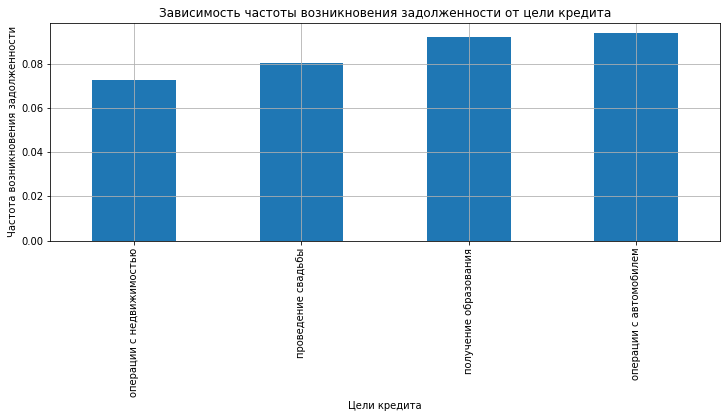

In [75]:
from matplotlib import pyplot as plt 


plt.figure(figsize=(12, 4))
clients_family_purpose[('debt',  'mean')].sort_values().plot.bar()
plt.grid(True)
plt.xlabel('Цели кредита')
plt.ylabel('Частота возникновения задолженности')
plt.title('Зависимость частоты возникновения задолженности от цели кредита')
plt.show()

Ну что же и по скольку мы аналитики любим вседелать красиво и аккуратно, я решил все это дело визуализировать
И проверить гипотезы о том, что возрат кредита в срок зависит от цели займа (пункт 3.4) <br>
1) визуализация будет отражать сравнение категорий цели<br>
2) столбчатая диаграмма, на оси ординат будут отложены 4 категории, а на оси абсцисс - вероятность возврата долга в срок.<br>
3) значения вероятности можно выразить в процентах.

# 4. Вывод

Мы проверили четыре гипотезы и установили:<br>
1. Возврат кредита в срок зависит от количества детей у заёмщика: *гипотеза подтверждена частично.* Дело в том, что я не увидел чёткой зависимоти вероятности возврата кредита в срок от количества детей. Увдел лишь, что бездетные клиенты данного банка допускают меньше просрочек, чем клиенты, у которых есть дети.
2. Возврат кредита в срок зависит от семейного положения заёмщика: *гипотеза подтверждена.* Оказалось, что клиенты, когда-либо состоявшие в официальном браке, с меньшей вероятностью допустят задолженность, чем те клиенты, кто никогда не регистрировал свои отношения.
3. Возврат кредита в срок зависит от уровня дохода клиента: *гипотеза подтверждена частично.* Уровень дохода можно считать недискретной величиной, поэтому чтобы утверждать, что есть какая-то зависимоть вероятности возврата кредита от уровня дохода, нужно увидеть некоторую математическую функцию. Да, люди с разным уровнем дохода по-разному выполняют обязательства перед банком, но чёткой линейной и даже экспоненциальной зависимости я не увидела.
4. Возрат кредита в срок зависит от цели займа: *гипотеза подтверждена.* С особым опасением следует одобрять кредиты на операции с автомобилем и получение образования, потому что среди клиентов данного банка наблюдается большая вероятность возникновения задолженности при обращении в банк с подобными целями.
